### 1. 切換 TensorFlow 版本及匯入所需套件

In [0]:
%tensorflow_version 2.x

In [0]:
# 標準動作
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

# Data Preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

### 2. 下載並整理 Fashion MNIST 資料集

In [0]:
# Load Data
(X_train, y_train0), (X_test, y_test0) = datasets.fashion_mnist.load_data()

# Reshape Size
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Normalization
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

4423680/4422102 [==============================] - 0s 0us/step


### 3. 建立模型

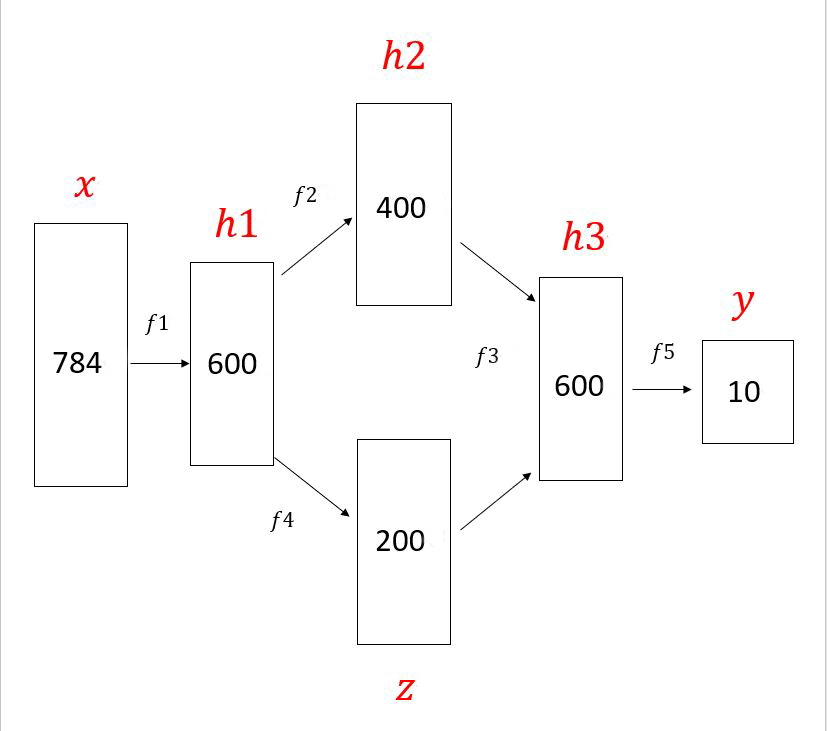

In [4]:
from IPython.display import Image
Image(filename="process.png")

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

修改項目: 
* 將h1修改為600維向量
* 分歧處的h2、z的維度並非承接h1的維度，而是兩者的總和等於600維

In [0]:
f_1 = Dense(600, activation='sigmoid')
f_2 = Dense(400, activation='sigmoid')
f_4 = Dense(200, activation='relu')
f_3 = Dense(600, activation='sigmoid')
f_5 = Dense(10, activation='softmax')

In [0]:
x = Input(shape=(784,))

In [0]:
h_1 = f_1(x)
h_2 = f_2(h_1)
z = f_4(h_1)
h_3 = concatenate([h_2, z])
y = f_5(h_3)

In [0]:
split_model = Model(x, y)
split_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 600)          471000      input_2[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 400)          240400      dense_10[0][0]                   
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 200)          120200      dense_10[0][0]                   
____________________________________________________________________________________________

修正項目: 
* optimizer使用SGD，learning rate設為0.075
* batch_size下修至128

In [0]:
split_model.compile(loss='mse', 
              optimizer=SGD(lr=0.075), 
              metrics=['accuracy'])

### 4. 訓練模型

In [0]:
split_model.fit(X_train, y_train, 
                batch_size=128, 
                epochs=5)

Epoch 1/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0891 - accuracy: 0.2889
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0856 - accuracy: 0.3892
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0809 - accuracy: 0.4089
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0739 - accuracy: 0.4538
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0657 - accuracy: 0.5436


In [0]:
score = split_model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

6/6 [==============================] - 1s 241ms/step - loss: 0.0617 - accuracy: 0.6068
Loss: 0.06168884411454201
準確率: 60.67500114440918


觀察：隱藏層中的神經元數目較範例程式減少(可訓練的參數減少)，並替換了optimizer、下修batch_size。從結果來看，神經網路的學習效果明顯下降不少(準確率: 87% → 60%)。